In [1]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [3]:
# create some data
mean_01 = np.array([0., 0.])
cov_01 = np.array([[1.0, 1.2], [1.2, 1.5]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print(data.shape)
# print(np.cov(data.T))

(800, 2)


In [6]:
def pca(X, k=None):
    # set number of output dims
    if k is None:
        k = X.shape[1]
    
    # compute the covariance
    A = np.cov(X.T)
    
    # Compute the eigenvectors and eigenvalues
    eig_val, eig_vec = np.linalg.eig(A)
    #Z = X.dot(W)
    return eig_val, eig_vec

In [8]:
lam, W = pca(data)
print(lam.shape, W.shape)

(2,) (2, 2)


In [10]:
print(lam)
print(W)

[0.02545654 2.3902987 ]
[[-0.776258   -0.63041535]
 [ 0.63041535 -0.776258  ]]


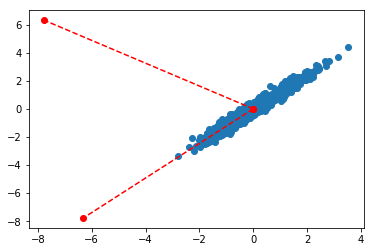

In [11]:
plt.figure(0)
plt.scatter(data[:, 0], data[:, 1])
plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

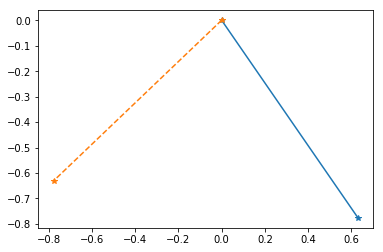

In [12]:
plt.plot([0, W[1, 0]], [0, W[0, 0]], '*-')
plt.plot([0, W[1, 1]], [0, W[0, 1]], '*--')

In [14]:
Z = data.dot(W[:])
print(Z.shape)
print(Z[:10])

(800, 2)
[[-0.04618047 -2.41504956]
 [-0.04167997  0.33568056]
 [-0.12033041 -1.13818892]
 [ 0.04589857 -2.03433465]
 [ 0.30420384  1.96323347]
 [-0.04002885  0.22719741]
 [-0.09998056  0.93413337]
 [ 0.27592333 -0.38710617]
 [-0.27729602  0.85370779]
 [ 0.07137632 -0.53388364]]


In [15]:
W.shape

(2, 2)

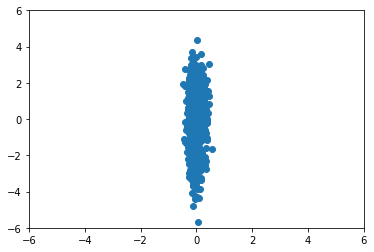

In [17]:
plt.figure(0)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.scatter(Z[:, 0], Z[:, 1])
# plt.plot([0, 10*W[0, 0]], [0, 10*W[1, 0]], 'ro--')
# plt.plot([0, 10*W[0, 1]], [0, 10*W[1, 1]], 'ro--')
plt.show()

In [18]:
np.cov(Z.T)

array([[ 2.54565401e-02, -3.55716013e-17],
       [-3.55716013e-17,  2.39029870e+00]])

In [20]:
print(np.cumsum(lam[::-1]/lam.sum()))

[0.98946229 1.        ]


# PCA on MNIST

In [22]:
ds = pd.read_csv('./train.csv')
data = ds.values[:10000, 1:]
print(data.shape)

(10000, 784)


In [24]:
A = np.cov(data.T)
print(A.shape)

(784, 784)


In [25]:
eig_vals, eig_vecs = np.linalg.eig(A)
print(eig_vals.shape)

(784,)


In [26]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix], eig_vecs[:, ix]]
    info.append(dx)
print(len(info))

784


In [27]:
info = sorted(info, key=lambda z: z[0], reverse=True)

In [28]:
sorted_lambda = []
sorted_W = []

for ix in range(len(info)):
    sorted_lambda.append(info[ix][0])
    sorted_W.append(info[ix][1])

sorted_lambda = np.asarray(sorted_lambda)
sorted_W = np.asarray(sorted_W)

/usr/local/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


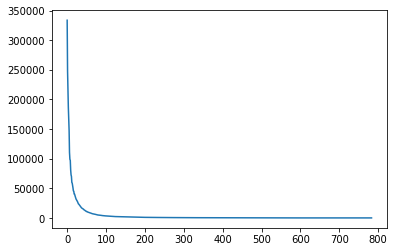

In [29]:
plt.plot(sorted_lambda)

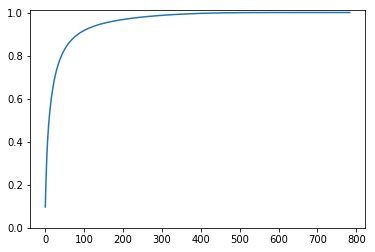

In [30]:
plt.figure(0)
plt.ylim(0, 1.01)
plt.plot(np.cumsum(sorted_lambda/sorted_lambda.sum()))
plt.show()

In [31]:
explained_variances_ratio = np.cumsum(sorted_lambda/sorted_lambda.sum())

In [32]:
for ix in range(explained_variances_ratio.shape[0]):
    if explained_variances_ratio[ix] <= 0.99:
        pass
    else:
        print(ix)
        break

326


In [33]:
k = 148
W = sorted_W[:, :k]
Z = data.dot(W)
print(Z.shape)

(10000, 148)


In [35]:
X_reconstruct = Z.dot(W.T)
print(X_reconstruct.shape)

print(np.asarray(X_reconstruct[0], dtype='uint8'))

(10000, 784)
[255 254 251 252   0 254   0   1   2 255   0   2   0   0   1 255 248 254
   0 252   0   1   3   4 255   0   4 253 255   1   3 249   5 251   3   0
   2   7 251 248   0   5   2   6 250   0   3   1 250  10 250   2   2 244
 243 250   2   1 251 251 253  10  10 251   5 253  16   3   2 253   1  18
   6   0   7 251 229 253 240 253 244  15   5   6 246 245 239 250   6  11
 248 255   1 223 227 242 255 249  10  23   2  12   6 240 246   9 228 249
 249 250   3  13  25   0  12 251 236  11  13  10  14 225  12 217 238 247
 253   5  17 245 250 236   0  13  14 247 221   6   1 232 241 233 255 247
 253  20  33  41 219 250   0   1 242 237 255 248 234 245 237  20  14  39
 225 236  25  11 222 255   7   5  32  11  10 235 245  16 240 254 226   2
  26 221   0   3  40 231  10  31  23  12  17 249   4 237   4 236 250   4
 238  14 217  11 248 248   1  20   3   1  13 231 240   6   1 242   6  18
  25   1 251  12   1  19 248  27 233 255   0  16  54 244  24 239 250  32
  21   0   6 240 249 250  16  12  39 2

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

X_ = pca.fit_transform(data)

In [39]:
X_re = pca.inverse_transform(X_)
X_re.shape

(10000, 784)

/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


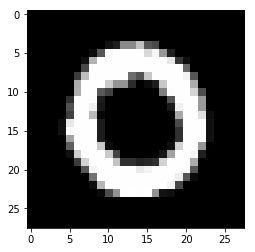

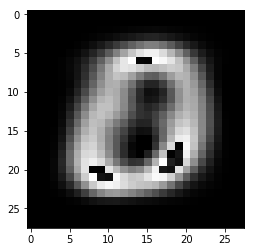

In [40]:
N = 1
plt.figure(0)
plt.grid("off")
plt.imshow(data[N].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.grid("off")
im = (X_re[N]>0)* X_re[N]
plt.imshow(np.asarray(im.reshape((28, 28)), dtype='uint8'), cmap='gray')

plt.show()